### Chapter 2

7(a)<br>
For the oil exploration prediction model, the prediction subject is the drilling site. We are assessing the likelihood than an exploratory drill performed at a site will be viable or not, hence it is the drilling site that we are interested in assessing for this prediction model.

7(b). Describe the domain concepts for this ABT.<br>

The key domain concepts for this ABT are:

Aerial Photographs: Aerial photography is the process of taking photographs of an area from above, for example from an airplane or mast. Typically hundreds of pictures taken from the air will be used to locate potential drilling sites.


Ordinance Survey Maps: Ordinance survey maps contains information related to physical and human features as symbol. They display location based data visually.

Rock and Soil samples: The purpose of a drilling and sampling program is to obtain samples that reasonably represent subsurface conditions over the entire project site. Soil and rock features can be captured from the analysis of soil and rock samples of a particular drilling site.

Gravitational and Siesmic measurements : Measurements from sensitive gravitational and seismic instruments of a site should be included in the ABT.

Viability: It is important to not forget about the target metric. This would come from some measure of the viability of a previous drill.

If the land categorization model was built, its output can also be used as an input to this model.


7(c) Domain Concept Diagram:<br>
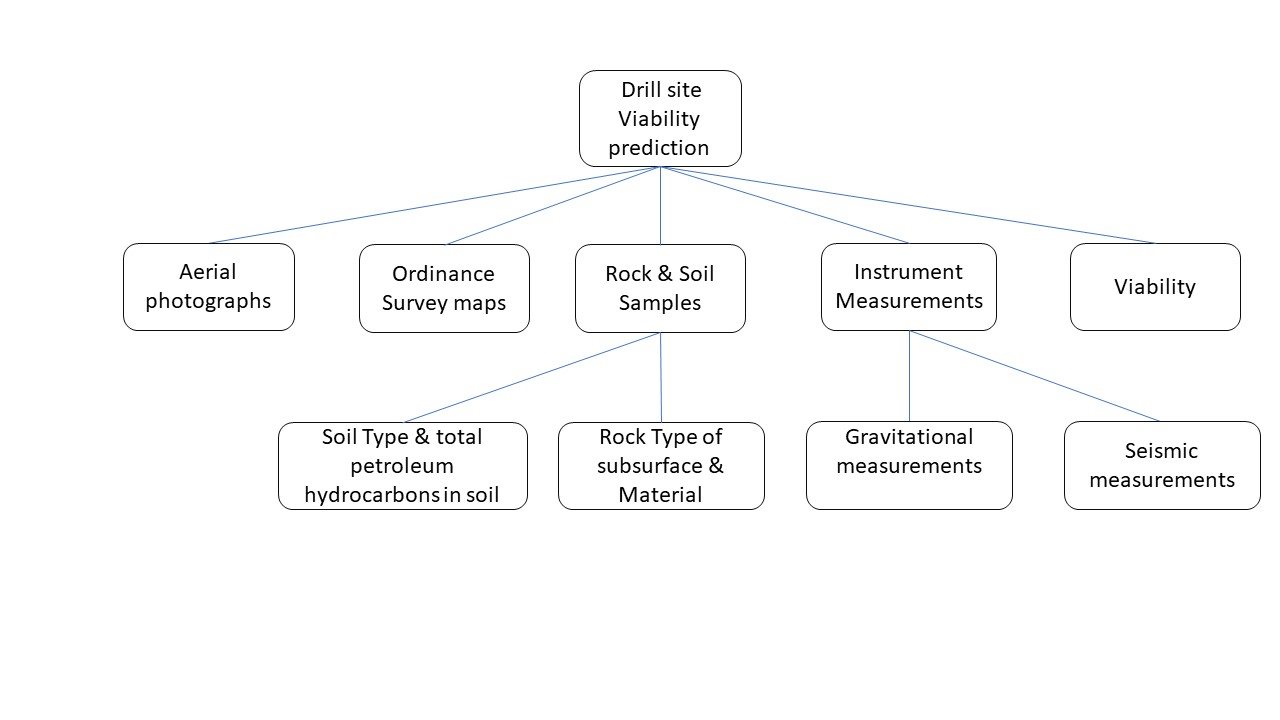

7(d)
There will not no legal complications for the above mentioned domain concepts. The oil firm should take necessary permissions to capture aerial images, to collect and process soil and rock samples of the drilling site.

## Chapter 3

#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**5 (a)**

In [2]:
df = pd.DataFrame([42,47,59,27,84,49,72,43,73,59,58,82,50,79,89,75,70,59,67,35],columns=['SCORE'])
hi=1
lo=0
norm_values = []

for i in df['SCORE']:
    norm_score = ((i - min(df['SCORE']))/((max(df['SCORE'])-min(df['SCORE'])))*(hi - lo)) + lo
    norm_values.append(norm_score)

norm_df=pd.DataFrame(norm_values,columns=['SCORE'])
norm_df

,SCORE
0,0.241935
1,0.322581
2,0.516129
3,0.000000
4,0.919355
5,0.354839
6,0.725806
7,0.258065
8,0.741935
9,0.516129


**5 (b):** Range normalization (values in the range (-1,1)

In [3]:
hi=1
lo=-1
norm_values = []

for i in df['SCORE']:
    norm_score = ((i - min(df['SCORE']))/((max(df['SCORE'])-min(df['SCORE'])))*(hi - lo)) + lo
    norm_values.append(norm_score)

norm_df=pd.DataFrame(norm_values,columns=['SCORE'])
norm_df

,SCORE
0,-0.516129
1,-0.354839
2,0.032258
3,-1.000000
4,0.838710
5,-0.290323
6,0.451613
7,-0.483871
8,0.483871
9,0.032258


**5 (c)** Standardization

In [4]:
mean = df['SCORE'].mean()
stdev = df['SCORE'].std()
df=df.assign(norm_score= lambda x: (x['SCORE'] - mean)/stdev)
norm_df=df[['norm_score']].copy(deep=True)
norm_df

,norm_score
0,-1.098428
1,-0.808605
2,-0.113031
3,-1.967896
4,1.336083
5,-0.692676
6,0.640508
7,-1.040464
8,0.698473
9,-0.113031


**6(a)**<br>

In [5]:
df1=pd.DataFrame([92,107,83,101,107,92,99,119,93,106,105,88,106,90,97,118,120,72,100,104],columns=['IQ'])
width= (max(df1['IQ'])-min(df1['IQ']))/5
width # As it is mentioned in the question that, we have to use 5 bins, width of each bin is 9.6

9.6

In [6]:
df1['IQ'].value_counts(bins=5,sort=False) #boundaries of each bin

(71.951, 81.6]    1
(81.6, 91.2]      3
(91.2, 100.8]     6
(100.8, 110.4]    7
(110.4, 120.0]    3
Name: IQ, dtype: int64

#### Histogram of data with 5 bins

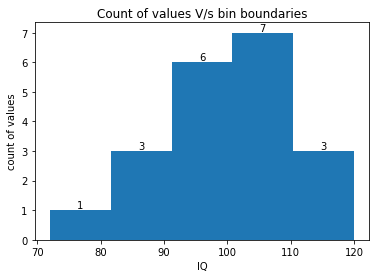

In [7]:
counts, edges, bars =plt.hist(df1['IQ'],bins=5)
plt.title('Count of values V/s bin boundaries')
plt.xlabel('IQ')
plt.ylabel('count of values')
plt.bar_label(bars)
plt.show()

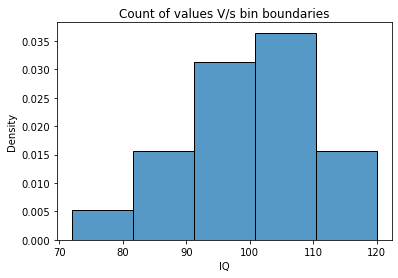

In [8]:
sns.histplot(df1['IQ'],bins=5,stat='density')
plt.title('Count of values V/s bin boundaries')
plt.xlabel('IQ')
plt.ylabel('Density')
plt.show()

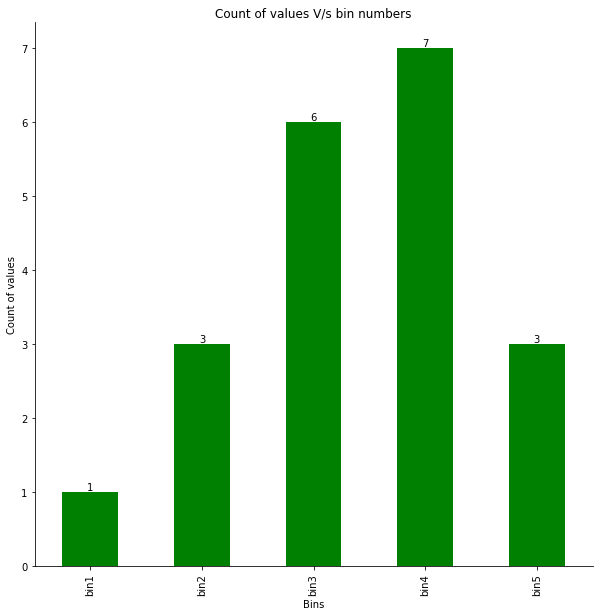

In [9]:
fig,ax=plt.subplots(1,1,figsize=(10,10))
df2=pd.cut(df1['IQ'],bins=5,labels=['bin1','bin2','bin3','bin4','bin5'])
axes=df2.value_counts().sort_index(ascending = True).plot(kind='bar',color='green')
plt.title('Count of values V/s bin numbers')
plt.xlabel('Bins')
plt.ylabel('Count of values')
axes.bar_label(ax.containers[0])
sns.despine()

**6 (b):** Equal frequency binning

In [10]:
no_of_bins=5
no_of_values=df1.shape[0]/no_of_bins
no_of_values

4.0

In [11]:
df1.sort_values(by=['IQ'],inplace=True)
df1.reset_index(drop=True,inplace=True)

In [12]:
count=0
bin=1
for i in range(0,df1.shape[0]):
    df1.loc[i,'bin']=bin
    count+=1
    if (count%no_of_values==0):
        bin+=1    

In [13]:
df1['bin']=df1['bin'].astype(int)
df1['bin']='Bin'+df1['bin'].astype(str)

In [14]:
df1

,IQ,bin
0,72,Bin1
1,83,Bin1
2,88,Bin1
3,90,Bin1
4,92,Bin2
5,92,Bin2
6,93,Bin2
7,97,Bin2
8,99,Bin3
9,100,Bin3


In [15]:
df1.groupby(['bin'],as_index=False).agg({'IQ':'count'})

,bin,IQ
0,Bin1,4
1,Bin2,4
2,Bin3,4
3,Bin4,4
4,Bin5,4


In [16]:
data=df1.groupby(['bin'],as_index=False).agg({'IQ':'count'}).copy(deep=True)

In [17]:
data

,bin,IQ
0,Bin1,4
1,Bin2,4
2,Bin3,4
3,Bin4,4
4,Bin5,4


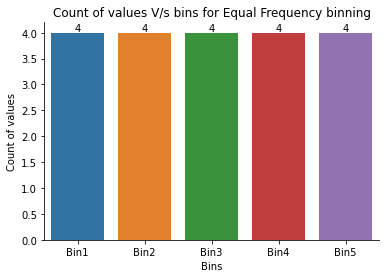

In [18]:
fig,ax=plt.subplots()
axes=sns.barplot(x='bin',y='IQ',data=data)
plt.title('Count of values V/s bins for Equal Frequency binning')
plt.xlabel('Bins')
plt.ylabel('Count of values')
axes.bar_label(ax.containers[0])
sns.despine()

**7(a)**

This data resembles a normal distribution almost exactly. The average is around 175. The most well-behaved type of data, seeing data that follows a normal distribution is nearly always encouraging in data analytics.

**7(b)**

An exponential distribution can be seen in this data. The probability of seeing greater numbers is constantly dropping and has a strong central tendency around 0. Since there are frequently large outliers, data with an exponential distribution can be challenging to manage and can cause modeling techniques to fail. In this case, at least one defendant had more than 40 prior convictions, which is quite unusual.

**7(c)**

The multimodal, or more especially the bimodal, nature of this data is obvious.
There seem to be two separate groupings, with one having a central tendency of about 110 and the other having one of around 160. Greater in size than the second group is the first. According to the data's description, these groups may include smokers (who have higher cholesterol readings) and non-smokers (with lower cholesterol values). More research is necessary because there is insufficient evidence to support this conjecture currently. One simple approach to do this is to create different histograms for smokers and non-smokers.


**7(d)**

Every ID number has the same likelihood as every other because of the nearly uniform distribution of this data.

**7(e)**

With a moderately strong right skew, this data has a unimodal distribution. This is typical of monetary elements like salaries, rental rates, and purchase costs. However, there will also be some high values. In this example, the strong central tendency is approximately 32,000. This type of distribution should always be interpreted as a sign that the data contains real outliers that might need to be addressed.

**9(a)** Missing Values

The H.R. DIFF. (13.03%), PREV. TACHY. (44.02%), and TACHYCARDIA (2.01%) features in the dataset all have missing values.
The H.R. DIFF feature's missing value count is not more and should not be taken out of the ABT, but the value is too high to consider the complete case removal. The feature should be noted in the data quality plan for possible handling in the future.
To handle the missing values, we can use mean imputation for this scenario.

There are a lot more values missing in the PREV. TARCHY. feature, nearly 44% of all the values are missing. The missing values are so high that this feature should be considered for removal from the ABT. As performing imputation will alter the majority of the data, it is better to remove the feature from the ABT.

Coming to TACHYCARDIA feature, this is a target feature, and we should not consider imputing the target variable. The instances which are missing the target variable should be removed from the dataset or ABT.

**9(b)** Irregular Cardinality

Many of the numeric features in the data set have cardinalities that are much less than rows of the dataset. As many of the continuous values will have specified ranges. When we look at the age bar plot, we can see that there are only seven distinct ages i.e., the cardinality of the age feature is seven which is very low for a numeric feature. It is better to treat the age as a categorical variable by using age ranges such as 10-19, and 20-29 bins instead of using the age directly as a numeric feature. Coming to the Gender feature, we can see that there are 4 genders in the gender bar plot. We can see that the four categories are 'f','female','m',' male'. So, the gender feature has a cardinality of 4 and it is a data quality (data consistency) issue that is responsible for it. This is quite a common issue with columns such as gender, 'f' should be properly labeled as 'female', and 'm' should be properly labeled as 'male'.

**9(c)** Outliers

Outliers are the values that deviate significantly from the measures of central tendency or simply put, these are values that fall out of the 6sigma distribution. After observing the data and the visualizations, there are 3 features that have outliers, HEIGHT, BMI and SYS. B.P.

Looking at the height column, we can see that there are values that are very less when compared with most of the other values. If we take a look at rows 1158 and 1159, we can see that the height is mentioned as 1.71 and 1.59 respectively for this column. Most probably, these data points are entered in meters while the rest of the data is captured in centimeters. This can be corrected by multiplying the aberrant data by a factor of 100. But before taking a call, we have to further investigate the root cause and keep in mind the data quality issue for future use.

Coming to BMI, this column is pretty much dependent on the height column. We can observe the same pattern for rows 1158 and 1159. BMI is mentioned as 314K and 596K which is not at all possible as BMI is simply calculated from height and weight (the formula for BMI is weight in kilograms divided by height in meters squared). We can clearly observe that the deviant height values discussed above are responsible for higher BMI values. If we resolve the deviant height values, values in the BMI column should get resolved.

In SYS. B.P. column, we can observe that there are outliers in the data from the table and the plots shown in the question. If we take a closer look at row 144, the value of SYS. B.P. is captured as 1144 which is ridiculed. Typically, systolic blood pressure values take a value of less than 150. Moreover, the highest ever recorded value is 370 to date. (source: https://pubmed.ncbi.nlm.nih.gov/7741618/). This should be handled by doing a mean imputation and it should be added to the data quality plan for further use in the future.

**9(d)** Feature distributions

The target variable feature seems to be evenly distributed and this should be a plus as both classes have almost equal entries, there is no need to do sampling.
Most of the continuous or integer variables are normally distributed. The H.R. DIFF. the feature seems to be somewhat bimodal with a peak on the upper side. We can find out whether any target class is aligned with high values in the H.R. DIFF. feature.

### Housing Data Analysis (housing.csv)

##### Importing data

In [19]:
housing_df=pd.read_csv("https://raw.githubusercontent.com/Venky80493/DATA245/main/Assignments/HW1/housing.csv")

##### Exploring data

In [20]:
housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [21]:
housing_df.shape

(20640, 10)

In [22]:
housing_df.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [23]:
housing_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [24]:
housing_df.describe(include='all')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1H OCEAN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9136
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,NaN
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,NaN
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,NaN
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,NaN
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,NaN
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,NaN


##### Checking NULL and Duplicate values

In [25]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [26]:
housing_df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [27]:
print('Percentage of missing data:',round((housing_df.isna().sum().sum()/housing_df.shape[0])*100,5),'%')

Percentage of missing data: 1.00291 %


We can observe that there are 207 missing values out of 20640 values in the total_bedrooms column. We can drop the null values as they comprise very less percentage of the data.

In [28]:
housing_df=housing_df.dropna().reset_index(drop=True)

In [29]:
housing_df.duplicated().value_counts() #There are no duplicates in the data

False    20433
dtype: int64

#### Measures of Central Tendency, Dispersion and Variability

In [30]:
mean=housing_df.select_dtypes([np.number]).mean(axis=0)
mean

longitude               -119.570689
latitude                  35.633221
housing_median_age        28.633094
total_rooms             2636.504233
total_bedrooms           537.870553
population              1424.946949
households               499.433465
median_income              3.871162
median_house_value    206864.413155
dtype: float64

In [31]:
median=housing_df.select_dtypes([np.number]).median(axis=0)
median

longitude               -118.4900
latitude                  34.2600
housing_median_age        29.0000
total_rooms             2127.0000
total_bedrooms           435.0000
population              1166.0000
households               409.0000
median_income              3.5365
median_house_value    179700.0000
dtype: float64

In [32]:
mode=housing_df.select_dtypes([np.number]).mode(axis=0)
mode

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-118.31,34.06,52.0,1527.0,280.0,891.0,306.0,3.125,500001.0


In [33]:
min=median=housing_df.select_dtypes([np.number]).min(axis=0)
min

longitude              -124.3500
latitude                 32.5400
housing_median_age        1.0000
total_rooms               2.0000
total_bedrooms            1.0000
population                3.0000
households                1.0000
median_income             0.4999
median_house_value    14999.0000
dtype: float64

In [34]:
max=median=housing_df.select_dtypes([np.number]).max(axis=0)
max

longitude               -114.3100
latitude                  41.9500
housing_median_age        52.0000
total_rooms            39320.0000
total_bedrooms          6445.0000
population             35682.0000
households              6082.0000
median_income             15.0001
median_house_value    500001.0000
dtype: float64

In [35]:
range=max-min
range

longitude                 10.0400
latitude                   9.4100
housing_median_age        51.0000
total_rooms            39318.0000
total_bedrooms          6444.0000
population             35679.0000
households              6081.0000
median_income             14.5002
median_house_value    485002.0000
dtype: float64

In [36]:
stdev=median=housing_df.select_dtypes([np.number]).std(axis=0)
stdev

longitude                  2.003578
latitude                   2.136348
housing_median_age        12.591805
total_rooms             2185.269567
total_bedrooms           421.385070
population              1133.208490
households               382.299226
median_income              1.899291
median_house_value    115435.667099
dtype: float64

In [37]:
var=median=housing_df.select_dtypes([np.number]).var(axis=0)
var

longitude             4.014324e+00
latitude              4.563981e+00
housing_median_age    1.585536e+02
total_rooms           4.775403e+06
total_bedrooms        1.775654e+05
population            1.284161e+06
households            1.461527e+05
median_income         3.607307e+00
median_house_value    1.332539e+10
dtype: float64

In [38]:
def find_iqr(x):
    return np.subtract(*np.percentile(x,[75,25]))
housing_df.select_dtypes([np.number]).apply(find_iqr)

longitude                  3.7900
latitude                   3.7900
housing_median_age        19.0000
total_rooms             1693.0000
total_bedrooms           351.0000
population               935.0000
households               324.0000
median_income              2.1803
median_house_value    145200.0000
dtype: float64

In [39]:
correlation=housing_df.corr()
correlation

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550,-0.045398
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626,-0.144638
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.106432
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,0.133294
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.025300
households,0.056513,-0.071774,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.064894
median_income,-0.015550,-0.079626,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.688355
median_house_value,-0.045398,-0.144638,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,1.000000


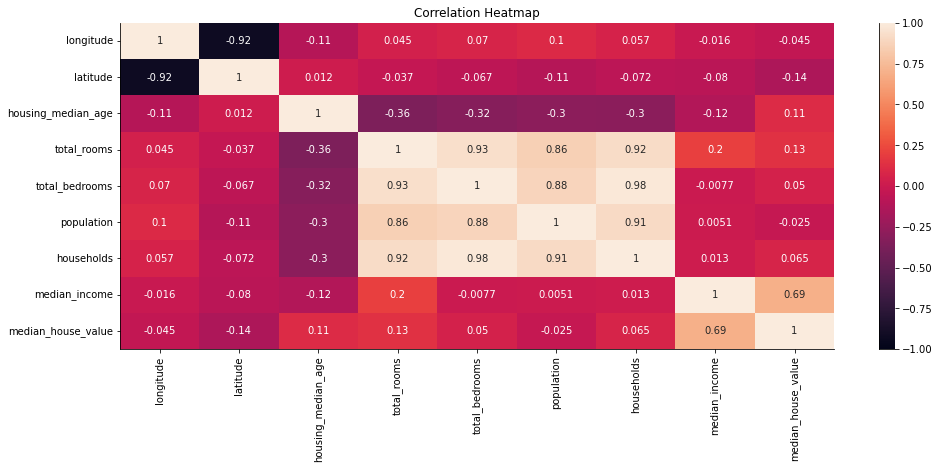

In [40]:
fig,ax=plt.subplots(1,1,figsize=(16,6))
sns.heatmap(correlation,vmin=-1, vmax=1,annot=True)
plt.title('Correlation Heatmap')
sns.despine()

We can see that Median Income has highest correlation with the median house value

#### Scatter Plots of all numeric columns

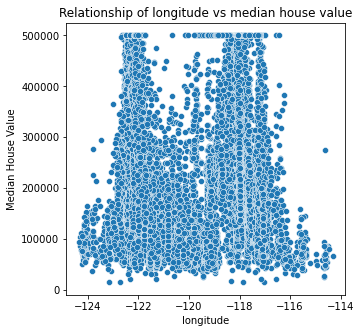

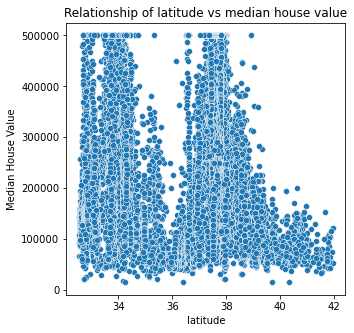

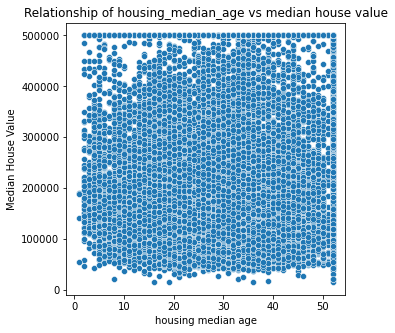

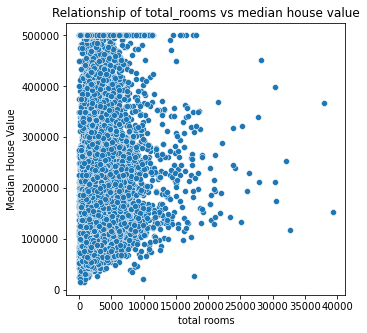

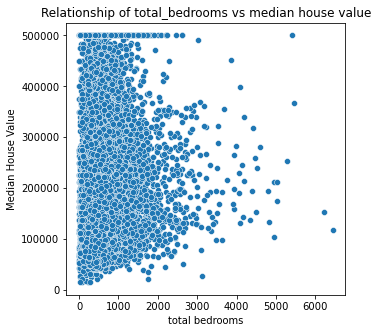

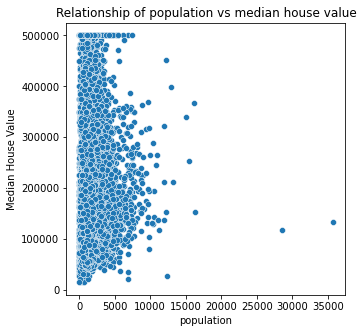

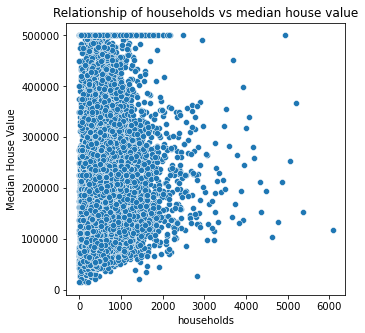

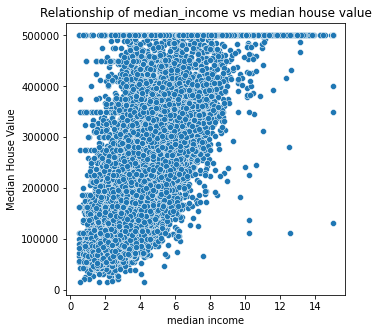

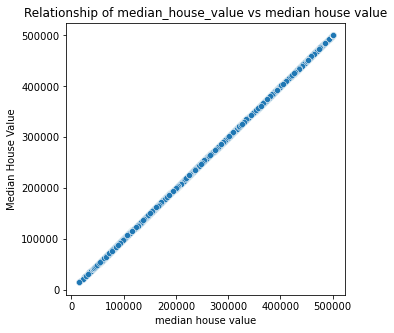

In [41]:
for i in housing_df.select_dtypes([np.number]).columns:
    plt.figure(figsize=(5,5))
    sns.scatterplot(x=i, y='median_house_value', data=housing_df)
    plt.title('Relationship of '+i+' vs median house value')
    plt.xlabel(i.replace('_',' '))
    plt.ylabel('Median House Value')
    plt.show()

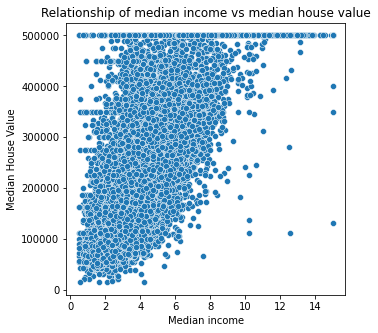

In [42]:
plt.figure(figsize=(5,5))
sns.scatterplot(x='median_income', y='median_house_value', data=housing_df)
plt.title('Relationship of median income vs median house value')
plt.xlabel('Median income')
plt.ylabel('Median House Value')
plt.show()

I plotted the graph of median house value and median income separately as they have high correlation value. Here median income is in tens of thousands of dollars. We can see that majority of the houses fall in the first half of the plot.

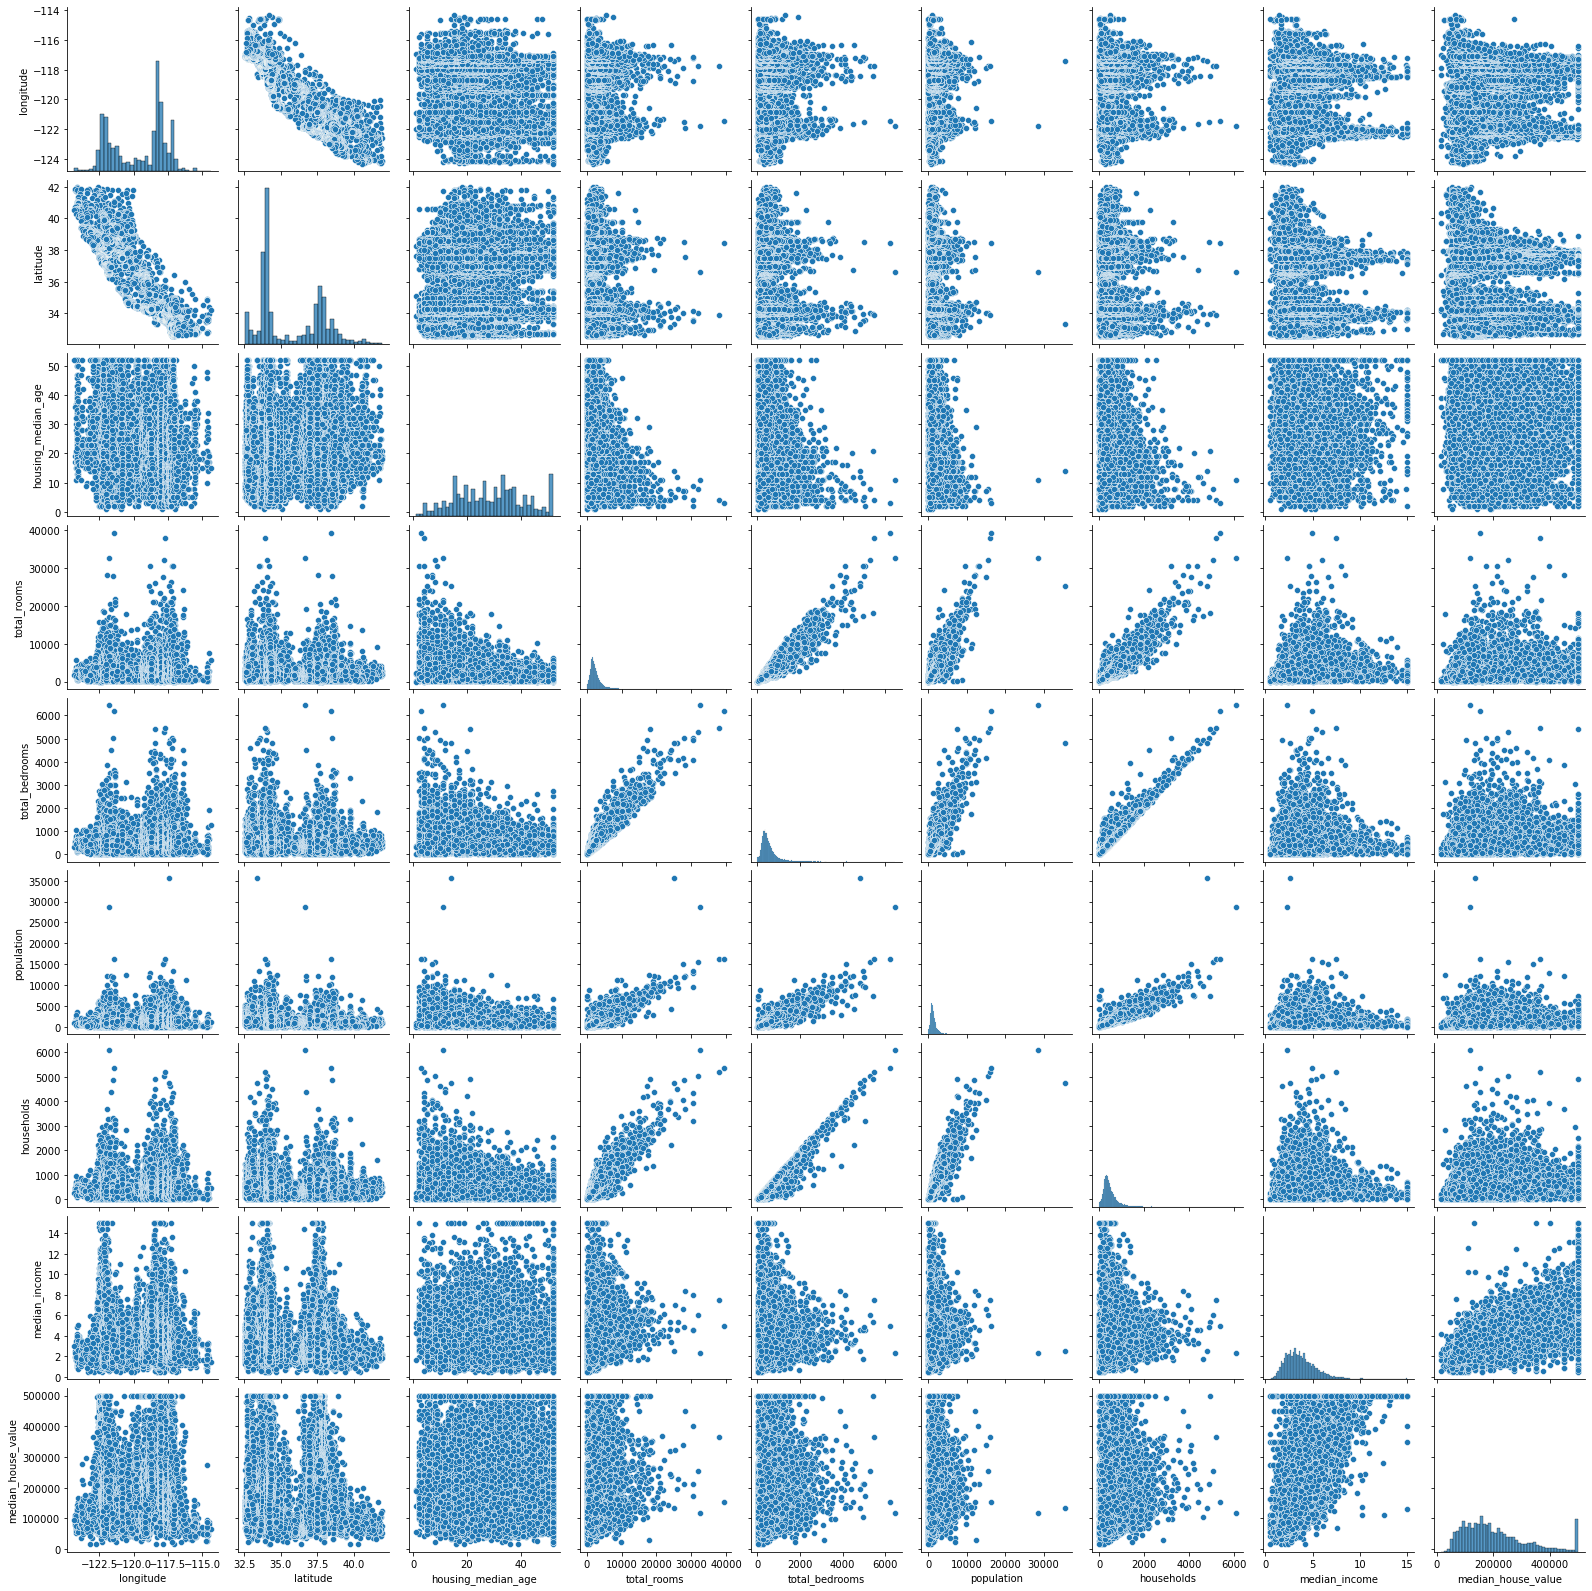

In [43]:
sns.pairplot(housing_df)
sns.despine()

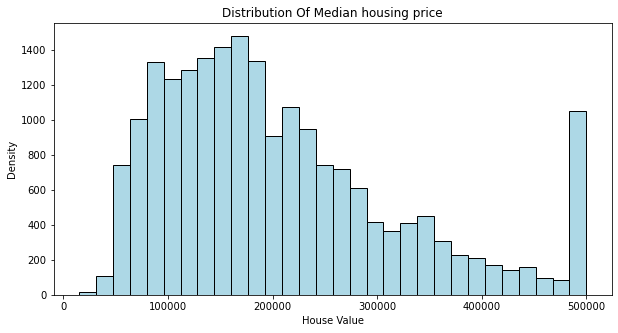

In [44]:
plt.figure(figsize=(10,5))
Dist_median_house=plt.hist(housing_df.median_house_value,bins=30,color='lightblue',edgecolor='black')
plt.title("Distribution Of Median housing price")
plt.ylabel('Density')
plt.xlabel('House Value')
plt.show()

We can observe that the distribution is somewhat inclined with the normal distribution, the distribution is a **right skewed** one and is similar to normal distribution

#### Box plots of all numeric columns

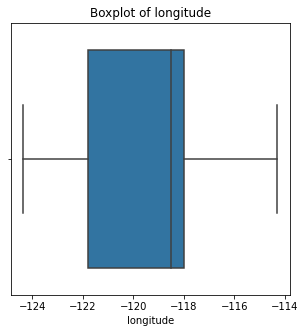

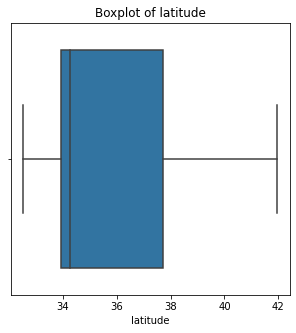

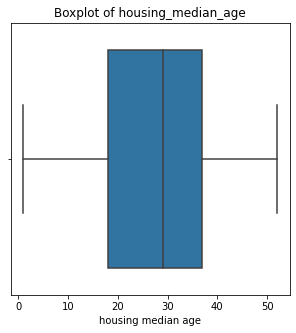

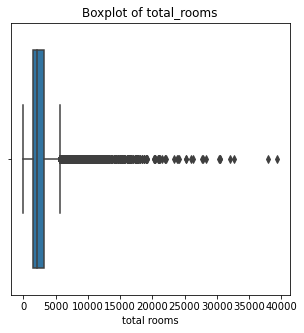

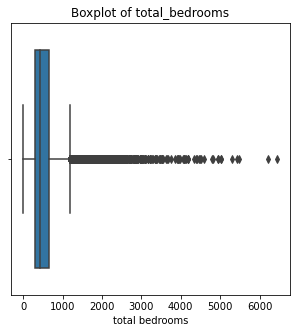

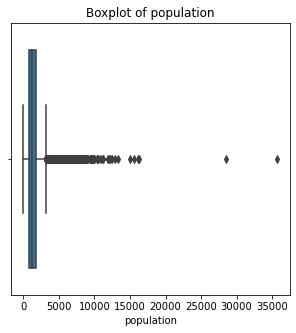

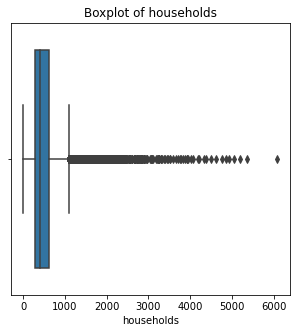

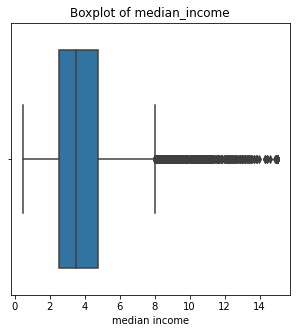

In [45]:
for i in housing_df.select_dtypes([np.number]).columns:
    if i!='median_house_value':
        plt.figure(figsize=(5,5))
        sns.boxplot(x=i,  data=housing_df)
        plt.title('Boxplot of '+i)
        plt.xlabel(i.replace('_',' '))
        plt.show()

We can observe that there are outliers in **total rooms, total bedrooms, population, households,median income columns**

In [46]:
housing_df.groupby(['ocean_proximity'],as_index=False).agg({'median_house_value':'count'}).sort_values(by='median_house_value')
#Count of houses by location

,ocean_proximity,median_house_value
2,ISLAND,5
3,NEAR BAY,2270
4,NEAR OCEAN,2628
1,INLAND,6496
0,<1H OCEAN,9034


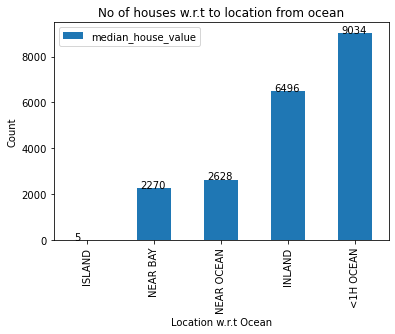

In [47]:
housing_df.groupby(['ocean_proximity']).agg({'median_house_value':'count'}).sort_values(by='median_house_value').plot(kind='bar')
plt.title("No of houses w.r.t to location from ocean")
plt.ylabel('Count')
plt.xlabel('Location w.r.t Ocean')
list1=housing_df.groupby(['ocean_proximity'],as_index=False).agg({'median_house_value':'count'}).sort_values(by='median_house_value').reset_index(drop=True)['median_house_value'].to_list()
list1=[int(item) for item in list1]
xlocs, xlabs = plt.xticks()
for i, v in enumerate(list1):
    plt.text(xlocs[i] - 0.2, v + 0.5, str(list1[i]))
plt.show()

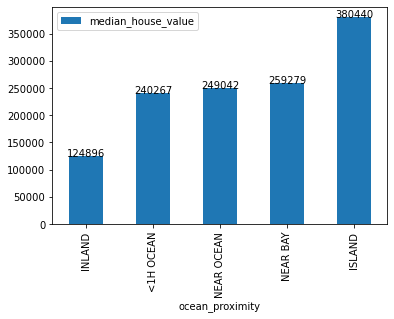

In [48]:
housing_df.groupby(['ocean_proximity']).agg({'median_house_value':'mean'}).sort_values(by='median_house_value').plot(kind='bar')
list1=housing_df.groupby(['ocean_proximity'],as_index=False).agg({'median_house_value':'mean'}).sort_values(by='median_house_value').reset_index(drop=True)['median_house_value'].to_list()
list1=[int(item) for item in list1]
xlocs, xlabs = plt.xticks()
for i, v in enumerate(list1):
    plt.text(xlocs[i] - 0.28, v + 0.01, str(list1[i]))

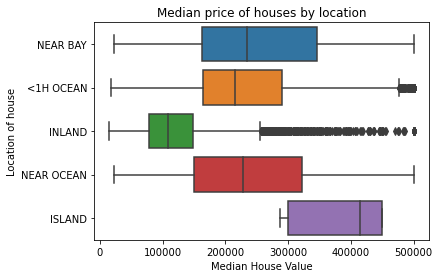

In [49]:
sns.boxplot(x="median_house_value", y='ocean_proximity',data=housing_df)
plt.title('Median price of houses by location')
plt.xlabel('Median House Value')
plt.ylabel('Location of house')
plt.show()

We can see that count of Island houses are the least. **Island, Near bay and Near ocean houses have high median prices**. There are **outliers in Inland and <1H Ocean categories**. **Inland and <1H Ocean locations have more number of houses** compared to other three locations. **As supply is limited in the Island, Near bay and Near ocean houses prices might be higher due to the supply and demand gap.**

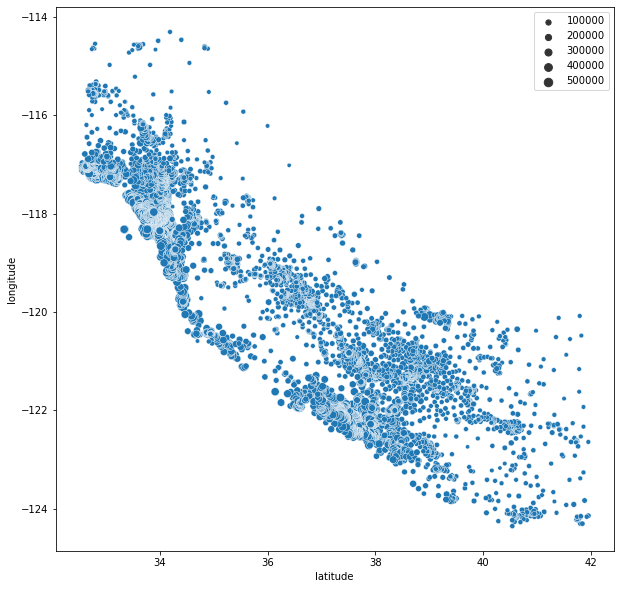

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [50]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=housing_df.latitude.values,y=housing_df.longitude.values,size=housing_df.median_house_value.values)
plt.ylabel("longitude")
plt.xlabel("latitude")
plt.show()
sns.despine

<Figure size 864x720 with 0 Axes>

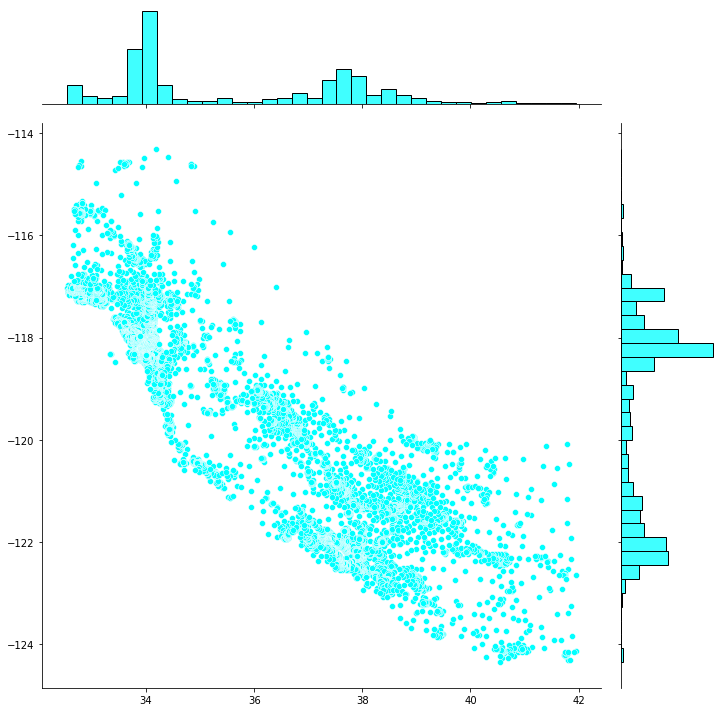

In [51]:
plt.figure(figsize=(12,10))
sns.jointplot(x=housing_df.latitude.values,y=housing_df.longitude.values,height=10,color='cyan')
plt.ylabel("longitude")
plt.xlabel("latitude")
plt.show()

#### Installing folium library

In [1]:
pip install folium


     -------------------------------------- 102.3/102.3 kB 2.0 MB/s eta 0:00:00


In [2]:
import folium
from folium.plugins import HeatMap
map_hooray = folium.Map(location=[36.7783,-119.4179],
                    zoom_start = 6, min_zoom=5) 

df = housing_df[['latitude', 'longitude']]
data = [[row['latitude'],row['longitude']] for index, row in df.iterrows()]
HeatMap(data, radius=10).add_to(map_hooray)
map_hooray

NameError: name 'housing_df' is not defined

We can see that all the hoouses are from the **California state.** We can also see the clusters of houses across **Los angeles and San Francisco.**